# Second Assignment: World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

### Logistics

The first assignment was worth 35 points. This second assignment contains 13 questions - each correct answer will be worth 5 points, for a total of 65 points. In order to pass overall you will need to reach at least 40 points out of 100 from the two assignments.

**Advice:** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

**Submission:** Please send your solutions to the Weekly Classes Office (weeklyclasses@conted.ox.ac.uk) with a signed DoA (Declaration of Authorship) form. Please send the notebook with your name appended to the file name.

**Deadline: Please see Canvas**

To get started, load `pandas`, `numpy`, and `matplotlib`.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots

## 1. Global Population Growth


The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="https://www.pewresearch.org/wp-content/uploads/2015/06/fT_15.06.04_popCount.png"/> 
</a>

In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first table we will consider is the total population of each country over time. Run the cell below.

In [4]:
# The population.csv file should also be found online here:
# https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv
# The version in this project was downloaded in February, 2017.
population = pd.read_csv('population.csv')
population.head(3)

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286


### Bangladesh

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Inspect the standard to find the 3-letter code for Bangladesh.

**Question 1.** Create a `DataFrame` called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2015 (including both 1970 and 2015) and the second should contain the population of Bangladesh in each of those years.

In [5]:
b_pop = population[population['geo'] == 'bgd'].drop('geo', axis=1)
b_pop

,time,population_total
7139,1600,12918659
7140,1601,12944609
7141,1602,12970611
7142,1603,12996665
7143,1604,13022772
...,...,...
7635,2096,173596204
7636,2097,172575292
7637,2098,171557566
7638,2099,170545249


Create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [6]:
fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = b_pop[b_pop['time'].isin(fives)]
b_five

,time,population_total
7509,1970,65048701
7514,1975,71247153
7519,1980,81364176
7524,1985,93015182
7529,1990,105983136
7534,1995,118427768
7539,2000,131280739
7544,2005,142929979
7549,2010,151616777
7554,2015,160995642


**Question 2.** Create a table called `b_five_growth` that includes three columns, `time`, `population_total`, and `annual_growth`. There should be one row for every five years from 1970 through 2010 (but not 2015). The first two columns are the same as `b_five`. The third column is the **annual** growth rate for each five-year period. For example, the annual growth rate for 1975 is the yearly exponential growth rate that describes the total growth from 1975 to 1980 when applied 5 times.

*Hint*: Only your `b_five_growth` table will be scored for correctness; the other names are suggestions that you are welcome to use, change, or delete.

In [7]:
b_1970_through_2010 = np.arange(1970, 2011, 5)
initial = b_pop[b_pop['time'].isin(b_1970_through_2010)].reset_index(drop=True)

changed = b_five.diff()

initial['changed'] = changed['population_total'].iloc[1:].reset_index(drop=True)

def calculate_annual(total, change):
    final_value = total + change
    return ((final_value / total) ** (1 / 5)) - 1

initial['annual_growth'] = initial.apply(lambda x: calculate_annual(x['population_total'], x['changed']), axis=1)

b_five_growth = initial.drop('changed', axis=1)

b_five_growth

,time,population_total,annual_growth
0,1970,65048701,0.018370
1,1975,71247153,0.026912
2,1980,81364176,0.027127
3,1985,93015182,0.026447
4,1990,105983136,0.022453
5,1995,118427768,0.020821
6,2000,131280739,0.017149
7,2005,142929979,0.011870
8,2010,151616777,0.012077


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [8]:
life_expectancy = pd.read_csv('life_expectancy.csv')
child_mortality = pd.read_csv('child_mortality.csv')
fertility = pd.read_csv('fertility.csv')

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

Text(0.5, 1.0, 'Life expectancy at birth over time')

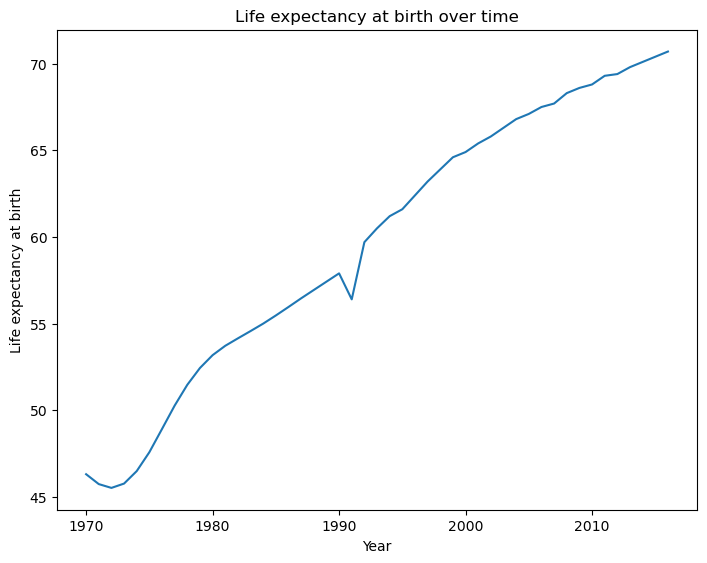

In [18]:
life_expectancy_bgd = life_expectancy[(life_expectancy['geo'] == 'bgd') & (life_expectancy['time'] >= 1970)]

life_expectancy_bgd

fig = plots.figure()

ax = fig.add_axes([0, 0, 1, 1])

ax.plot(life_expectancy_bgd['time'], life_expectancy_bgd['life_expectancy_years'])

ax.set_xlabel('Year')

ax.set_ylabel('Life expectancy at birth')

ax.set_title('Life expectancy at birth over time')

Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not? What happened in Bangladesh in 1991, and does that event explain the change in population growth rate?

### ANSWER

This graph does not explain why population growth rate has decreased as people are expected to live significantly longer. There was a drop in life expectancy in 1991 but this looks to be an anomoly. It is likely that there was an external factor in 1991 that reduced life expectancy.

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 4.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. It returns a two-column table with labels "`Year`" and "`Children per woman`" that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for Bangladesh and the year 1970 in order to plot how Bangladesh's fertility rate has changed since 1970. **The expression that draws the line plot is provided for you; please don't change it.**

In [53]:
def fertility_over_time(country: str, start: int) -> pd.DataFrame:
    """
    Create a two-column DataFrame that describes a country's total fertility rate each year.
    :param country - alpha-3 code for the country
    :param start - start year
    """
    return fertility[(fertility['geo'] == country) & (fertility['time'] >= start)].drop(['geo'], axis=1).reset_index(drop=True)

   time  children_per_woman_total_fertility
0  1970                                6.95
1  1971                                6.94
2  1972                                6.93
3  1973                                6.90
4  1974                                6.87


<Axes: xlabel='time'>

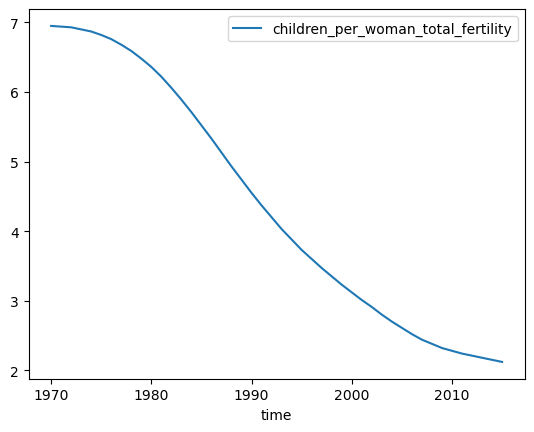

In [ ]:
bangladesh_code = fertility_over_time('bgd', 1970)

bangladesh_code.plot(0, 1) # You should *not* change this line.

**Question 5.** Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not?

### ANSWER

This does go to explain the decrease in the population growth rate. The children per woman fertility rate has dropped significantly between 1985 to 2010 which would correlate to a decrease in the population growth rate.

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 6.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram with one point for each year, starting with 1970, that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis. 

**The expression that draws the scatter diagram is provided for you; please don't change it.** Instead, create a table called `fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label "`Children per woman`" to describe total fertility and the label "`Child deaths per 1000 born`" to describe child mortality.

<Axes: xlabel='Children per woman', ylabel='Child deaths per 1000 born'>

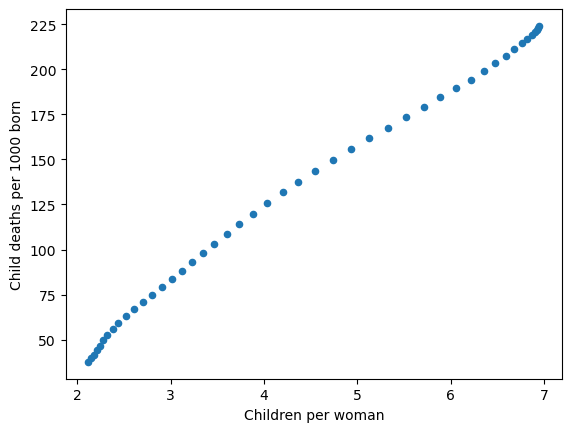

In [78]:

fertility_filtered = fertility[(fertility['geo'] == 'bgd') & (fertility['time'] >= 1970)].drop(['geo'], axis=1)
child_mortality_filtered = child_mortality[(child_mortality['geo'] == 'bgd') & (child_mortality['time'] >= 1970)].drop(['geo'], axis=1)


fertility_and_child_mortality = pd.merge(fertility_filtered, child_mortality_filtered, on=['time']).rename(columns={"children_per_woman_total_fertility": "Children per woman", "child_mortality_0_5_year_olds_dying_per_1000_born": "Child deaths per 1000 born"})


fertility_and_child_mortality.head(5)





# You should *not* change the statement below
fertility_and_child_mortality.plot.scatter(
    'Children per woman', 'Child deaths per 1000 born'
) 

In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children?

### ANSWER

It shows that there is correlation between the number of children per woman and child mortality. However, the correlation does not necessarily imply that reduced child mortality causes parents to choose to have fewer children.

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1960 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

In [79]:
fertility[fertility.time == 1960]


,geo,time,children_per_woman_total_fertility
160,afg,1960,7.67
376,alb,1960,6.19
592,dza,1960,7.65
808,ago,1960,7.32
1024,atg,1960,4.43
...,...,...,...
42492,vnm,1960,6.35
42708,vir,1960,5.62
42924,yem,1960,7.29
43140,zmb,1960,7.02


In [80]:
fertility[fertility.time == 1960].iloc[:, [0, 2]].set_index("geo")

,children_per_woman_total_fertility
geo,
afg,7.67
alb,6.19
dza,7.65
ago,7.32
atg,4.43
...,...
vnm,6.35
vir,5.62
yem,7.29


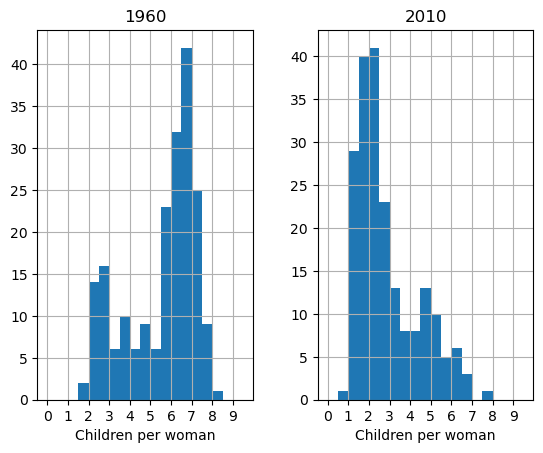

In [21]:
ax = pd.concat([
    fertility[fertility.time == 1960].iloc[:, [0, 2]].rename(
        columns={"children_per_woman_total_fertility": "1960"}
    ).set_index("geo"),
    fertility[fertility.time == 2010].iloc[:, [0, 2]].rename(
        columns={"children_per_woman_total_fertility": "2010"}
    ).set_index("geo")
], axis=1).hist(bins=np.arange(0, 10, 0.5))
for ix in range(len(ax[0])):
    ax[0][ix].set_xlabel('Children per woman')
    ax[0][ix].set_xticks(np.arange(10))

**Question 7.** Assign `fertility_statements` to a list of the numbers for each statement below that can be correctly inferred from these histograms.
1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1960 and 2010.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. In 1960, less than 20% of countries had a fertility rate below 3.
1. More countries had a fertility rate above 3 in 1960 than in 2010.
1. At least half of countries had a fertility rate between 5 and 8 in 1960.
1. At least half of countries had a fertility rate below 3 in 2010.

In [ ]:
fertility_statements = []

**Question 8.** Draw a line plot of the world population from 1800 through 2005. The world population is the sum of all the country's populations. 

In [ ]:
# write your solution here
...

**Question 9.** Create a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2010. This restriction will speed up computations later in the project.

In [ ]:
big_50 = population[(population["time"] == 2010)].sort_values(
    by="population_total", ascending=False
).head(50)
population_of_big_50 = big_50.population_total
big_50.sample(5)

In [ ]:
# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.

def stats_for_year(year: int) -> pd.DataFrame:
    """
    Return a DataFrame with the stats for each country that year.
    """
    pass

In [ ]:
# You should verify the function you have written is correct
# by running this cell for year 2010
stats_for_year(2010)


**Question 10.** Create a table called `pop_by_decade` with two columns called `decade` and `population`. It has a row for each `year` since 1960 that starts a decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. For example, 1960 is the first year of the 1960's decade. You should see that these countries contain most of the world's population.

*Hint:* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column. 

In [ ]:
decades = pd.DataFrame({
    'decade': np.arange(1960, 2011, 10)
    }
)

def pop_for_year(year):
    ...

pop_by_decade = ...

The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [ ]:
countries = pd.read_csv('../datasets/countries.csv')
countries[['country', 'name', 'world_6region']]

## 2. Global Poverty


In 1800, 85% of the world's 1 billion people lived in *extreme poverty*, defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." A common measure of extreme poverty is a person living on less than \$1.25 per day.

In 2015, the proportion of people living in extreme poverty was estimated to be 12%. Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still close to 1 billion. The United Nations recently adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."
In this section, we will examine extreme poverty trends around the world.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [23]:
population = pd.read_csv('population.csv')
# NOTE: The code here below is 'pseudo-code' and you have to modify it in order to have it working accordingly
population.head(5)

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [25]:
countries =  pd.read_csv('countries.csv')
countries = countries[countries['country'].isin(population.geo.unique())]
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 1 to 274
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 255 non-null    object 
 1   gwid                    254 non-null    object 
 2   name                    255 non-null    object 
 3   world_6region           254 non-null    object 
 4   income_groups           213 non-null    object 
 5   landlocked              254 non-null    object 
 6   g77_and_oecd_countries  253 non-null    object 
 7   main_religion_2008      216 non-null    object 
 8   gapminder_list          254 non-null    object 
 9   alternative_1           69 non-null     object 
 10  alternative_2           37 non-null     object 
 11  alternative_3           23 non-null     object 
 12  alternative_4_cdiac     215 non-null    object 
 13  pandg                   147 non-null    object 
 14  god_id                  254 non-null    object 

In [29]:
poverty = pd.read_csv('poverty.csv')
poverty.sample(3)

FileNotFoundError: [Errno 2] No such file or directory: 'poverty.csv'

**Question 11.** Assign `latest` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the *most recent year* for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: the `first` function may be helpful, but you are not required to use it.

In [ ]:
def first(values):
    return values.item(0)

latest = ...

# This line **should** work as it is, but you can change it
# as you see fit
latest.rename(
    columns={0: 'geo', 1: 'time', 2: 'poverty_percent'}
)

**Question 12.** Using both `latest` and `population`, create a four-column table called `recent` with one row for each country in `latest`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

In [ ]:
poverty_and_pop = ...
recent = ...
recent

**Question 13.** Assuming that the `poverty_total` numbers in the `recent` table describe *all* people in 2010 living in extreme poverty, assign the name `poverty_percent` to the percentage of the world's 2010 population that were living in extreme poverty. You should find a number that is somewhat above the 2015 global estimate of 12%, since many country-specific poverty rates are older than 2015.

*Hint*: The sum of the `population_total` column in the `recent` table is not the world population, because only a subset of the world's countries have known poverty rates. Use the `population` table to compute the world's 2010 total population.

In [ ]:
poverty_percent = ...
poverty_percent

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [ ]:
countries[['country', 'name', 'world_4region', 'latitude', 'longitude']]

**You're finished!** Congratulations on mastering data visualization and table manipulation. Time to submit.